<a href="https://colab.research.google.com/github/egyptai/KNN/blob/main/BreastCancer20210603.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler

In [63]:
cancer = load_breast_cancer()

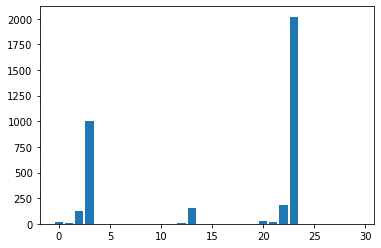

In [64]:
plt.bar(np.arange(30), cancer['data'][0])
plt.show()

In [65]:
scaler = StandardScaler()
z_cancer = scaler.fit_transform(cancer['data'])

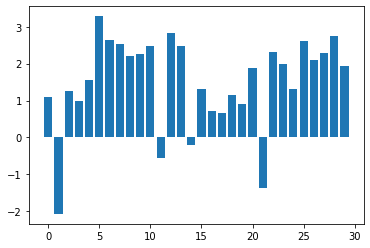

In [66]:
plt.bar(np.arange(30), z_cancer[0])
plt.show()

In [67]:
trainX, testX, trainY, testY = train_test_split(z_cancer, cancer['target'], test_size = 0.2)

In [68]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
predY = knn.predict(testX)
accuracy = (testY == predY).mean()
print()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % accuracy)


* 시험용 데이터로 측정한 정확도 = 0.96


In [70]:
predY = knn.predict(trainX)
accuracy = (trainY == predY).mean()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % accuracy)

* 학습용 데이터로 측정한 정확도 = 0.98


In [71]:
testAcc = []
trainAcc = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k, p = 2, metric = 'minkowski')
    knn.fit(trainX, trainY)
    predY = knn.predict(testX)
    testAcc.append((testY == predY).sum() / len(predY))
    predY = knn.predict(trainX)
    trainAcc.append((trainY == predY).sum() / len(predY))

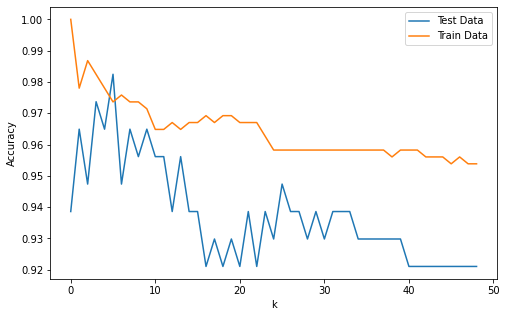

In [72]:
plt.figure(figsize = (8, 5))
plt.plot(testAcc, label = "Test Data")
plt.plot(trainAcc, label = "Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()